<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import gEconpy as ge
import gEconpy.plotting as gp

In [20]:
mod = ge.gEconModel('baxter_king.gcn')

Model Building Complete.
Found:
	19 equations
	19 variables
	The following "variables" were defined as constants and have been substituted away:
		B_t,mc_t
	3 stochastic shocks
		 0 / 3 has a defined prior. 
	8 parameters
		 0 / 8 has a defined prior. 
	4 calibrating equations
	4 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [21]:
mod.steady_state()
mod.solve_model(not_loglin_variable=['Div', 'TR'])

Steady state found! Sum of squared residuals is 7.984282102087844e-21
Solution found, sum of squared residuals:  4.5969663721398165e-31
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


Values of parameters have been found that satisfy the calibrating constraints: $Y_{ss} = 1$, $r^G_{ss} = 6.5\%$, $w_{ss} = 2$, $N_{ss} = \frac{1}{3}$. Because $Y_ss$ was normalized to be 1, it means the steady-state values of fiscal policy parameters are simply the parameters $\bar{G}_B$ and $\bar{I}_G$, and steady-state income is $\bar \tau$. As a result. these didn't require any special treatment to hit the requested values.

In [22]:
mod.print_steady_state()

C_ss                 0.708
Div_ss              -0.000
G_B_ss               0.200
I_G_ss               0.020
I_ss                 0.072
K_G_ss               0.800
K_ss                 2.889
L_ss                 0.667
N_ss                 0.333
TC_ss               -1.000
TR_ss               -0.000
U_ss               -15.425
Y_ss                 1.000
lambda_L_ss          2.204
lambda_ss            1.413
r_G_ss               1.065
r_ss                 0.115
tau_ss               0.220
w_ss                 2.000


In addition, the following parameter values were calibrated:
A_bar                1.493
beta                 0.939
theta_K              0.333
theta_L              1.469


In [23]:
mod.free_param_dict

{'G_B_bar': 0.2,
 'I_G_bar': 0.02,
 'delta': 0.025,
 'rho_G_B': 0.75,
 'rho_I_G': 0.75,
 'rho_tau': 0.75,
 'tau_bar': 0.22,
 'theta_G': 0.1}

In [24]:
mod.free_param_dict['rho_G_B'] = 1
mod.steady_state()
mod.solve_model(solver='gensys')

Steady state found! Sum of squared residuals is 7.984282102087844e-21
Gensys found a unique solution.
Policy matrices have been stored in attributes model.P, model.Q, model.R, and model.S
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


In [25]:
# Y_ss = 1, so a 1 CU increase is just 0.01
irf = mod.impulse_response_function(simulation_length=22, shock_size=0.01)
irf = irf.loc[:, 1:].xs(axis=1, level=1, key='epsilon_GB').T

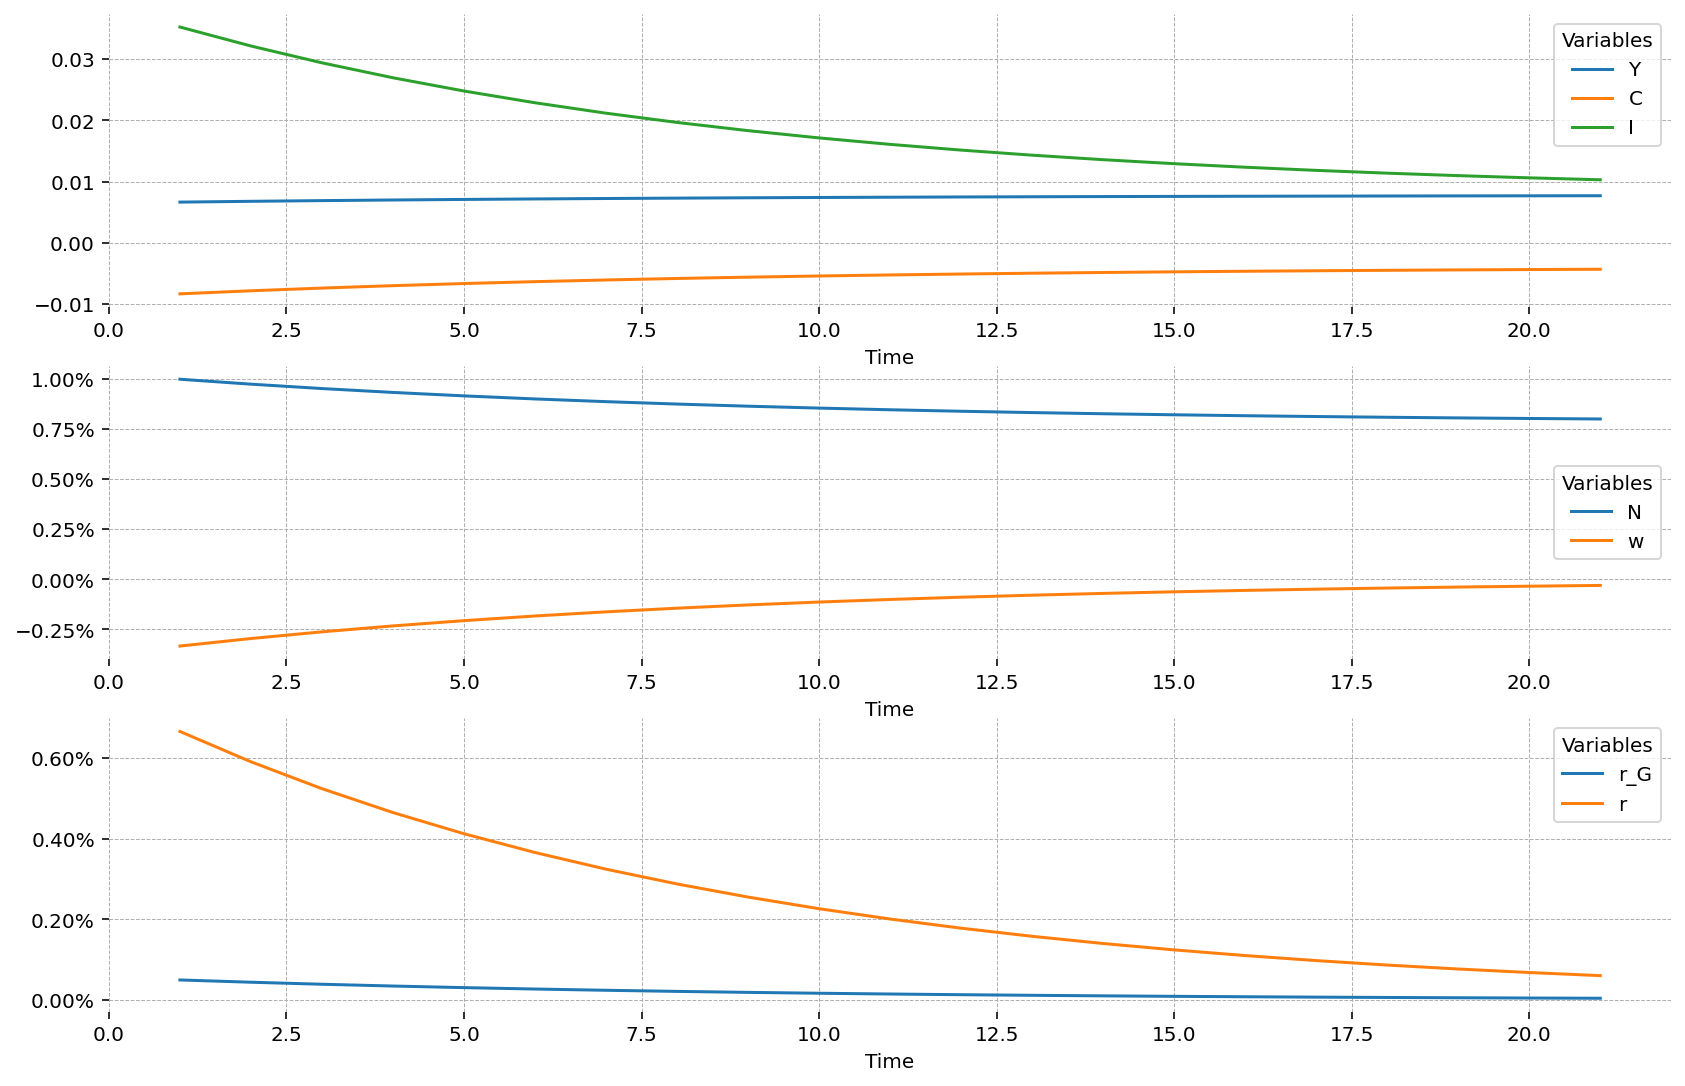

In [29]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
to_plot = [['Y', 'C', 'I'], ['N', 'w'], ['r_G', 'r']]
fig, ax = plt.subplots(3, 1, figsize=(14,9), dpi=144)

for i, (axis, var_list) in enumerate(zip(fig.axes, to_plot)):
    irf[var_list].plot(ax=axis)
    [spine.set_visible(False) for spine in axis.spines.values()]
    axis.grid(ls='--', lw=0.5)
    if i > 0:
        axis.yaxis.set_major_formatter(mtick.PercentFormatter(1))
